## Observations and Insights 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy import stats 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

all_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
#mouse_metadata.shape
#study_results.shape
#all_data.shape


# Display the data table for preview


all_data.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1873,z795,Naftisol,Female,13,29,0,45.000000,0
1874,z795,Naftisol,Female,13,29,5,46.833475,0
1875,z795,Naftisol,Female,13,29,10,48.030804,0
1876,z795,Naftisol,Female,13,29,15,49.368132,1
1877,z795,Naftisol,Female,13,29,20,53.280657,1
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [2]:
# Checking the number of mice.
mice = all_data["Mouse ID"].unique()
noMice = len(mice)
print(f"The number of mice is {noMice}")




The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate_mouse_ids = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids = duplicate_mouse_ids[0]




In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = all_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
all_data.loc[all_data["Mouse ID"] == duplicate_mouse_ids]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [6]:
# Checking the number of mice in the clean DataFrame.
noMice = len(all_data["Mouse ID"].unique())
noMice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drugmean = all_data.groupby(["Drug Regimen"]).mean()
#drugmean["Tumor Volume (mm3)"]
drugmedian = all_data.groupby(["Drug Regimen"]).median()
drugmedian["Tumor Volume (mm3)"]
drugvariance = all_data.groupby(["Drug Regimen"]).var()
drugstddev = all_data.groupby(["Drug Regimen"]).std()
drugsem = all_data.groupby(["Drug Regimen"]).sem()
drugSummaryStats = {"Drug Regimen Mean": drugmean["Tumor Volume (mm3)"], 
                    "Drug Regimen Median" : drugmedian["Tumor Volume (mm3)"],
                   "Drug Regimen Variance" : drugvariance["Tumor Volume (mm3)"], 
                    "Drug Standard Deviation" : drugstddev["Tumor Volume (mm3)"],
                   "Drug Regimen Standard Error" : drugsem["Tumor Volume (mm3)"]}
drugSummaryStats = pd.DataFrame(data = drugSummaryStats)
drugSummaryStats



,Drug Regimen Mean,Drug Regimen Median,Drug Regimen Variance,Drug Standard Deviation,Drug Regimen Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


#See above

## Bar and Pie Charts

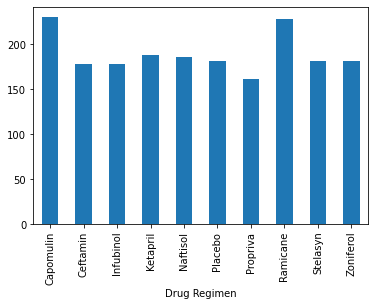

In [57]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
UniqueMiceByDrug = all_data.groupby(["Drug Regimen"]).count()
UniqueMiceByDrug = UniqueMiceByDrug['Mouse ID']
UniqueMiceByDrug.plot.bar()
plt.show()

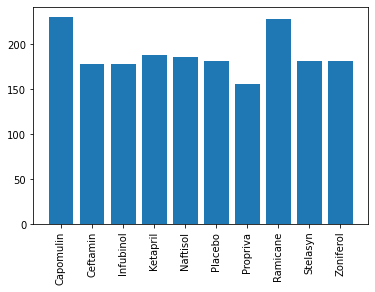

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

UniqueMiceByDrug = all_data.groupby(["Drug Regimen"]).count()
UniqueMiceByDrug = UniqueMiceByDrug['Mouse ID']

drugregimen = UniqueMiceByDrug.keys().to_list()
UniqueMiceByDrug = UniqueMiceByDrug.to_list()
plt.bar(drugregimen, UniqueMiceByDrug)
plt.xticks(rotation=90)
plt.show()


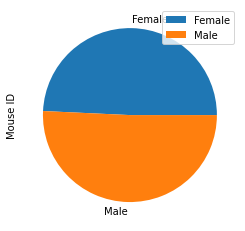

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MouseSex = all_data.groupby('Sex').count()
#MouseSex.plot.pie(y='Sex')
MouseSex = MouseSex.plot.pie(y = 'Mouse ID')





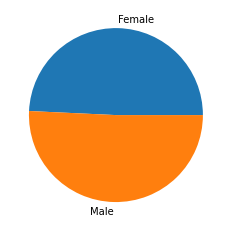

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

MouseSex = all_data.groupby('Sex').count()
MouseSexLegend = MouseSex.index
MouseSex = MouseSex["Mouse ID"]
plt.pie(MouseSex, labels=MouseSexLegend)
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



#By looking at the last timepoint for each mouse I want to get the final tumor volume.
#From here I want to group everything by Drug Regimen.  Then I will want to make a box
#plot for Capomulin, Ramicane, Infubinol, and Ceftamin and their respective final tumor volumes.  




#data = all_data[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']]
 
#x = data.index.to_list()
#Make arrays of indexes
#for index, row in data.iterrows():
    
#    if row['Drug Regimen'] == 'Capomulin':
#        x.remove(index)
#    elif row['Drug Regimen'] == 'Ramicane':
#        x.remove(index)
#    elif row['Drug Regimen'] == 'Infubinol':
#        x.remove(index)
#    elif row['Drug Regimen'] == 'Ceftamin':
#        x.remove(index)
#    else:
#        pass
    
#data = data.drop(x)

#data = data.groupby(['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)'])['Timepoint'].max()




In [14]:
data = all_data.groupby(['Mouse ID'])['Timepoint'].max()
data = data.reset_index()
data = data.merge(all_data, on=['Mouse ID', 'Timepoint'], how = 'left')
drugList = ['Ramicane','Capomulin','Infubinol','Ceftamin']

for drug in drugList:
    
    tumor_data = data.loc[data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list = []
    tumor_vol_list.append(tumor_data)
    
data = data.merge(data, how='inner',on=['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen'])
data = data[['Mouse ID','Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
 


ramicane = []
capomulin = []
infubinol = []
ceftamin = []

for index,row in data.iterrows():
    
    
    if row['Drug Regimen'] == 'Capomulin':
        capomulin.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin.append(row['Tumor Volume (mm3)'])
        
#print(f"capomulin:{capomulin}, \nramicane:{ramicane}, \ninfubinol:{infubinol}, \nceftamin:{ceftamin}")

#len(data)
print(tumor_data)
tumor_indexes = tumor_data.index
print(tumor_indexes)

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64
Int64Index([  3,  21,  22,  25,  58,  76,  89,  95, 107, 108, 110, 111, 114,
            135, 151, 155, 185, 189, 190, 210, 224, 229, 232, 239, 241],
           dtype='int64')


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

tumor_data = pd.DataFrame(tumor_data, columns=['Tumor Volume (mm3)'])    
 
quartiles = tumor_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"tumor_data:{tumor_data}")

print(f"lowerq:{lowerq}, upperq:{upperq}, iqr:{iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"lowerbound:{lower_bound}, upperbound:{upper_bound}")
outlier_occupancy = tumor_data.loc[(tumor_data['Tumor Volume (mm3)'] < lower_bound) | (tumor_data['Tumor Volume (mm3)'] > upper_bound)]


print(f"outlier_occupancy:{outlier_occupancy}")




tumor_data:     Tumor Volume (mm3)
3             62.999356
21            45.000000
22            56.057749
25            55.742829
58            48.722078
76            47.784682
89            61.849023
95            68.923185
107           67.748662
108           57.918381
110           46.784535
111           59.851956
114           64.299830
135           59.741901
151           61.433892
155           64.192341
185           45.000000
189           52.925348
190           45.000000
210           67.527482
224           45.000000
229           64.634949
232           61.386660
239           68.594745
241           64.729837
lowerq:48.72207785, upperq:64.29983003, iqr:15.577752179999997
lowerbound:25.355449580000002, upperbound:87.66645829999999
outlier_occupancy:Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


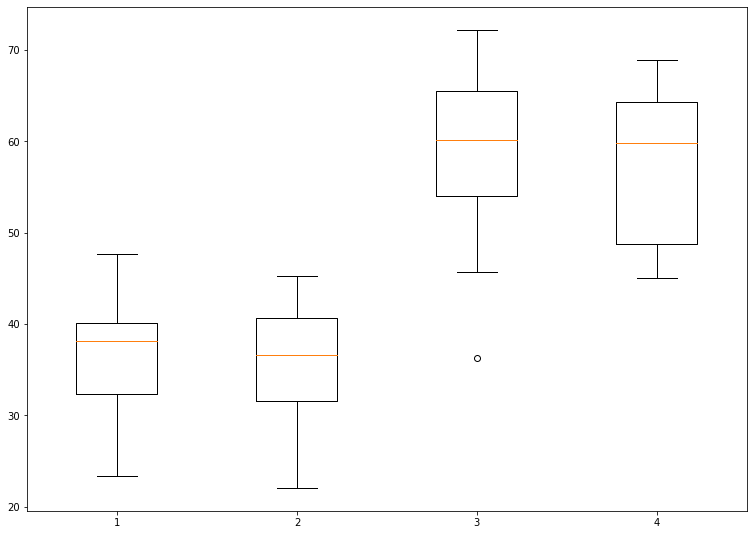

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



boxdata = [capomulin, ramicane, infubinol, ceftamin]
  
fig = plt.figure(figsize =(10, 7)) 
  

ax = fig.add_axes([0, 0, 1, 1]) 
  

bp = ax.boxplot(boxdata) 
  

plt.show() 

## Line and Scatter Plots

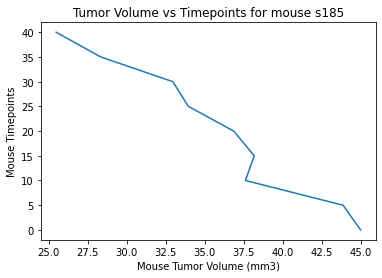

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouseCapo = all_data[10:19]

mouseCapo.head(50)

CapoTimepoints = mouseCapo['Timepoint']
CapoTumor = mouseCapo['Tumor Volume (mm3)']
CapoTumor

plt.plot(CapoTumor, CapoTimepoints)

plt.xlabel("Mouse Tumor Volume (mm3)")
plt.ylabel("Mouse Timepoints")
plt.title("Tumor Volume vs Timepoints for mouse s185")
plt.show()
all_data.head(50)

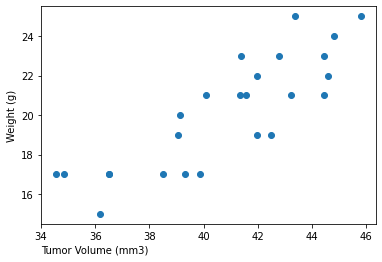

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_table = all_data.loc[all_data['Drug Regimen'] == "Capomulin"]
capomulin_table_volume = capomulin_table.groupby(['Mouse ID', 'Weight (g)'], as_index=False)['Tumor Volume (mm3)'].mean()
 
# print(capomulin_table_volume)



plt.scatter(capomulin_table_volume['Tumor Volume (mm3)'], capomulin_table_volume['Weight (g)'])
plt.xlabel('Tumor Volume (mm3)',loc="left")

plt.ylabel('Weight (g)')
plt.suptitle("Average Tumor Volume(mm3) vs. Mouse Weight(g) for the Capomulin regimen")



plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [56]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(capomulin_table_volume['Tumor Volume (mm3)'], 
                                            capomulin_table_volume['Weight (g)'])
print(f"The correlation coefficient is: {rvalue} ")

regress_values = capomulin_table_volume['Tumor Volume (mm3)'] * slope + intercept
print(f"y = {slope}x + {intercept}") 

The correlation coefficient is: 0.8419363424694718 
y = 0.7426941826944178x + -10.148863164111322
